In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import eig
from numpy.linalg import eig

In [30]:
data = np.array([[3,4], [2,8], [6,9], [10,12]])

In [31]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [32]:
data=pd.DataFrame(data, columns=["math", "bio"])

In [33]:
data

,math,bio
0,3,4
1,2,8
2,6,9
3,10,12


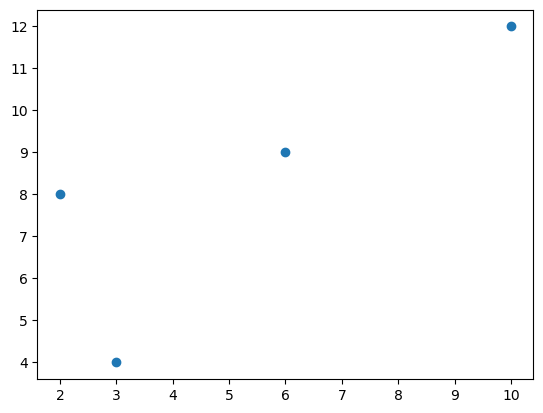

In [34]:
plt.scatter(data["math"], data["bio"])

- Steps to find PCA

1. Standardization
2. Coveariance Matrix
3. Eigen Values
4. Principle Components

In [7]:
data

,math,bio
0,3,4
1,2,8
2,6,9
3,10,12


**1. Standardization**

In [38]:
# mean

m = np.mean(data, axis=0)
m

math    5.25
bio     8.25
dtype: float64

In [39]:
# std

s = np.std(data, axis=0)
s

math    3.112475
bio     2.861381
dtype: float64

In [44]:
# standardizing data

data["strd_math"] = (data["math"] - m.iloc[0])/s.iloc[0]
data["strd_bio"] = (data["bio"] - m.iloc[1])/s.iloc[1]

In [45]:
data

,math,bio,strd_math,strd_bio
0,3,4,-0.722897,-1.485297
1,2,8,-1.044185,-0.087370
2,6,9,0.240966,0.262111
3,10,12,1.526117,1.310556


**Standard Scalar in Sklearn**

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
X = sc.fit_transform(data[["math", "bio"]])

In [49]:
X # column vcector

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [51]:
X.T # row vector

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

**2. Covariance Matrix**

In [55]:
cov_mat = np.cov(X.T) # covariance matrix

In [56]:
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

**3. Eigen Value and Eigen Vector**

In [60]:
eig(cov_mat)

EigResult(eigenvalues=array([2.40938985, 0.25727682]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))

In [64]:
# eigen values
eigen_value = eig(cov_mat)[0]

# eigne vectors
eigen_vector = eig(cov_mat)[1]

In [65]:
eigen_value

array([2.40938985, 0.25727682])

In [66]:
eigen_vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [68]:
X

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

**Let's Find PCA**

In [78]:
eigen_vector.T.dot(X.T).T # 1st and 2nd principle componenet

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

**Let's Check with Sklearn**

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2)

In [83]:
pca.fit_transform(X)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [87]:
pc = pd.DataFrame(pca.fit_transform(X), columns=["pc1", "pc2"])
pc

,pc1,pc2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [85]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [86]:
0.90352119 + 0.09647881

1.0

<Axes: >

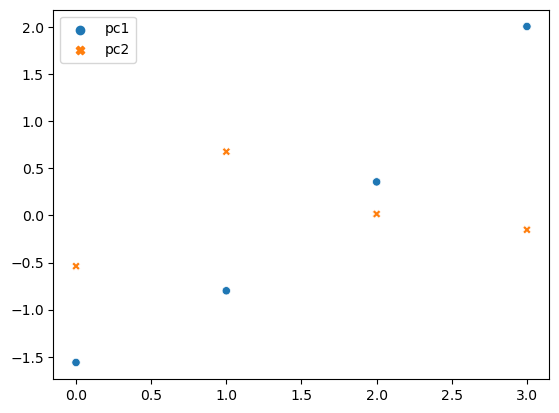

In [88]:
sns.scatterplot(pc)

In [89]:
data2 = pd.read_csv("datasets/heart.csv")

In [90]:
data2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


To take less number of columns, 

feature selection

PCA -> dimenssion reduction technique / feature extraction technique

In [91]:
data2 = data2.drop(["output"], axis=1)

In [92]:
data2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2


In [93]:
sc = StandardScaler()
sc.fit(data2)

StandardScaler()

In [95]:
X_sc = sc.transform(data2)

In [96]:
X_sc

array([[ 6.57008468e-01,  6.88832197e-01,  1.93018667e+00, ...,
        -2.31708691e+00, -6.98260956e-01, -2.20952640e+00],
       [-2.08527124e+00,  6.88832197e-01,  9.54969979e-01, ...,
        -2.31708691e+00, -6.98260956e-01, -5.29123427e-01],
       [-1.42712411e+00, -1.45173237e+00, -2.02467133e-02, ...,
         9.49440488e-01, -6.98260956e-01, -5.29123427e-01],
       ...,
       [ 5.47317279e-01,  6.88832197e-01,  1.93018667e+00, ...,
         9.49440488e-01,  1.26093726e+00, -5.29123427e-01],
       [-1.13866286e-03,  6.88832197e-01, -2.02467133e-02, ...,
         9.49440488e-01,  2.81338152e-01, -5.29123427e-01],
       [-1.10829851e-01,  6.88832197e-01, -9.95463406e-01, ...,
        -6.83823209e-01,  2.81338152e-01,  1.15127954e+00]])

In [97]:
pca2 = PCA()

In [98]:
pca2.fit(X_sc)

PCA()

In [100]:
principle_components = pca2.transform(X_sc)

In [101]:
principle_components.shape

(289, 13)

In [104]:
final_data = pd.DataFrame(principle_components, columns=["pc"+str(i) for i in range(principle_components.shape[1])])

In [105]:
final_data

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,0.554283,2.038291,3.426839,1.507988,0.211857,-1.935511,0.531372,0.356188,-0.439570,0.915871,-0.902398,-0.275488,0.347477
1,-0.387490,-1.155035,2.297382,1.764273,1.959884,1.012732,-0.160394,1.346352,0.809686,1.641801,-0.876524,-0.280738,0.258480
2,-1.737797,0.022923,-0.200385,0.653767,1.064540,-0.531346,-0.343528,0.144087,1.443831,-0.816793,0.244745,-0.112403,-1.163632
3,-1.726322,-0.550437,-0.086116,-0.078979,-0.184766,0.488795,-0.134481,-0.290863,-0.495052,0.450217,-0.681376,-1.030047,-0.153953
4,-0.322183,0.413033,-2.835485,0.241025,0.444336,0.464891,1.560495,0.365724,-0.103994,0.936297,0.401310,-0.842703,-0.079924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1.690536,-0.947197,-0.345293,-1.019771,0.077403,-0.226845,-0.227714,-1.332061,0.186289,-0.822765,0.693006,-0.723426,-0.890811
285,2.390438,-1.241932,-0.665180,-0.644225,0.063868,1.162615,0.583862,0.186660,0.380903,1.125415,0.232162,1.218246,0.084942
286,-1.232087,0.478249,1.239869,-0.415964,-1.532880,0.866346,-1.247160,-0.435684,-0.104949,0.877524,0.792256,-0.368023,-0.035579
287,-0.909739,0.645871,0.166530,-0.958277,0.281294,-0.420550,-0.859110,-1.640494,0.504050,-0.038105,-0.312350,0.260471,0.095319


In [106]:
pca2.explained_variance_ratio_

array([0.21461354, 0.11863687, 0.09622797, 0.08875555, 0.07879034,
       0.07426302, 0.06707516, 0.05902802, 0.05227436, 0.04610075,
       0.04374567, 0.03215651, 0.02833223])

In [109]:
sum([0.21461354, 0.11863687, 0.09622797, 0.08875555, 0.07879034,
       0.07426302, 0.06707516, 0.05902802, 0.05227436, 0.04610075,
       0.04374567, 0.03215651, 0.02833223])

0.9999999899999997

In [110]:
pca3 = PCA(n_components=2)
principle_components1 = pca3.fit_transform(X_sc)

In [111]:
final_data1 = pd.DataFrame(principle_components1, columns=["pc"+str(i) for i in range(principle_components1.shape[1])])
final_data1

,pc0,pc1
0,0.554283,2.038291
1,-0.387490,-1.155035
2,-1.737797,0.022923
3,-1.726322,-0.550437
4,-0.322183,0.413033
...,...,...
284,1.690536,-0.947197
285,2.390438,-1.241932
286,-1.232087,0.478249
287,-0.909739,0.645871


In [112]:
data3 = pd.read_csv("datasets/heart.csv")

In [113]:
final_data1["op"] = data3["output"]

In [114]:
final_data1.head()

,pc0,pc1,op
0,0.554283,2.038291,1
1,-0.387490,-1.155035,1
2,-1.737797,0.022923,1
3,-1.726322,-0.550437,1
4,-0.322183,0.413033,1


<Axes: xlabel='pc0', ylabel='pc1'>

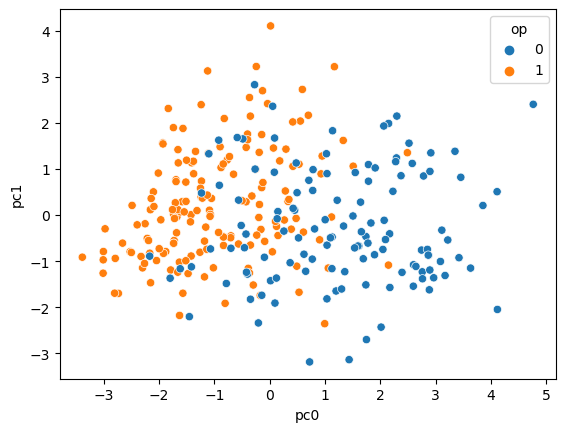

In [115]:
sns.scatterplot(data=final_data1, x="pc0", y="pc1", hue="op")

In [117]:
variance_components = pca2.explained_variance_ratio_

In [118]:
variance_components

array([0.21461354, 0.11863687, 0.09622797, 0.08875555, 0.07879034,
       0.07426302, 0.06707516, 0.05902802, 0.05227436, 0.04610075,
       0.04374567, 0.03215651, 0.02833223])

In [119]:
max(variance_components)

0.2146135354445523

In [120]:
min(variance_components)

0.02833223406383677

In [121]:
variance_components.sort()

In [122]:
sum(variance_components)

1.0

In [123]:
variance_components

array([0.02833223, 0.03215651, 0.04374567, 0.04610075, 0.05227436,
       0.05902802, 0.06707516, 0.07426302, 0.07879034, 0.08875555,
       0.09622797, 0.11863687, 0.21461354])

In [128]:
sum(sorted(list(variance_components), reverse=True)[:5])

0.5970242745952627

In [129]:
sum(sorted(list(variance_components), reverse=True)[:6])

0.6712872947846792

In [130]:
sum(sorted(list(variance_components), reverse=True)[:8])

0.7973904711592282

In [131]:
sum(sorted(list(variance_components), reverse=True)[:10])

0.8957655862588897

In [132]:
sum(sorted(list(variance_components), reverse=True)[:11])

0.9395112526058828

In [133]:
sum(sorted(list(variance_components), reverse=True)[:12])

0.9716677659361633